# Exercise 4: Basic Geoprocessing Tools
## Geographic Information Systems 1 Lab
### GEOG 3150

Remember to begin each exercise by creating a copy of this _colab notebook_ by going to **File > Save a copy in Drive**. Once you have a copy, go to **Runtime > Run all** to make sure you are connected and each cell of the exercise has been executed. If necessary, refer back to the [Exercise 2 Notebook](https://githubtocolab.com/chrismgentry/GIS1-Exercise-2/blob/main/GIS1_EX2.ipynb) for a refresher on how to work with **text cells**, **code cells**, and using the **Share** button at the top of the page. 

# Information

#### Before beginning the exercise be sure to thoroughly read the the exercise page on [GitHub](https://chrismgentry.github.io/GIS1-Exercise-4). This will provide additional information not covered in this notebook. It would be beneficial to have both windows open so you can refer back to the exercise at any time while working on this notebook. Throughout this notebook there will be various code cells and text cells you may need to edit. Simply double-click on the cell to open it for editing.

Atypical information regarding the _ggsn package_:<br>
"Due to a dependency issue, the following script had to be used to ensure that the _ggsn_ package would load correctly for this exercise."

In [1]:
system('sudo add-apt-repository ppa:ubuntugis/ubuntugis-unstable')
system('sudo apt-get update')
system('sudo apt-get install libudunits2-dev libgdal-dev libgeos-dev libproj-dev')

# Step One: The Data
The following steps will take you through the loading of packages, linking to the data, obtaining state information, and viewing datasets.

### Installing and loading packages
Note: This is a large number of packages and will take a while to load. Additonally, there are duplicate functions between several of the packages. Due to this, in several code blocks below you will see **::** (double colons) used in order to identify which function should be used in a given scenario.

In [2]:
install.packages('tidyverse')
install.packages('ggsn')
install.packages('cowplot')
install.packages('maps')
install.packages('mapproj')
install.packages('plyr')
install.packages('raster')
install.packages('rgeos')
install.packages('rgdal')
install.packages('sp')
library('tidyverse')
library('ggsn')
library('cowplot')
library('maps')
library('mapproj')
library('plyr')
library('raster')
library('rgeos')
library('rgdal')
library('sp')
library('utils')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘s2’, ‘units’, ‘sp’, ‘RgoogleMaps’, ‘plyr’, ‘rjson’, ‘jpeg’, ‘bitops’, ‘sf’, ‘png’, ‘maptools’, ‘ggmap’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecifi

### Creating base layers

In this exercise you will begin to more fully develop your maps. In order to accomplish this you will need to develop additional basemaps to provide context and reduce the overall blank spaces on the map. As with previous exercises, you will begin by using the states data form the _maps_ package.

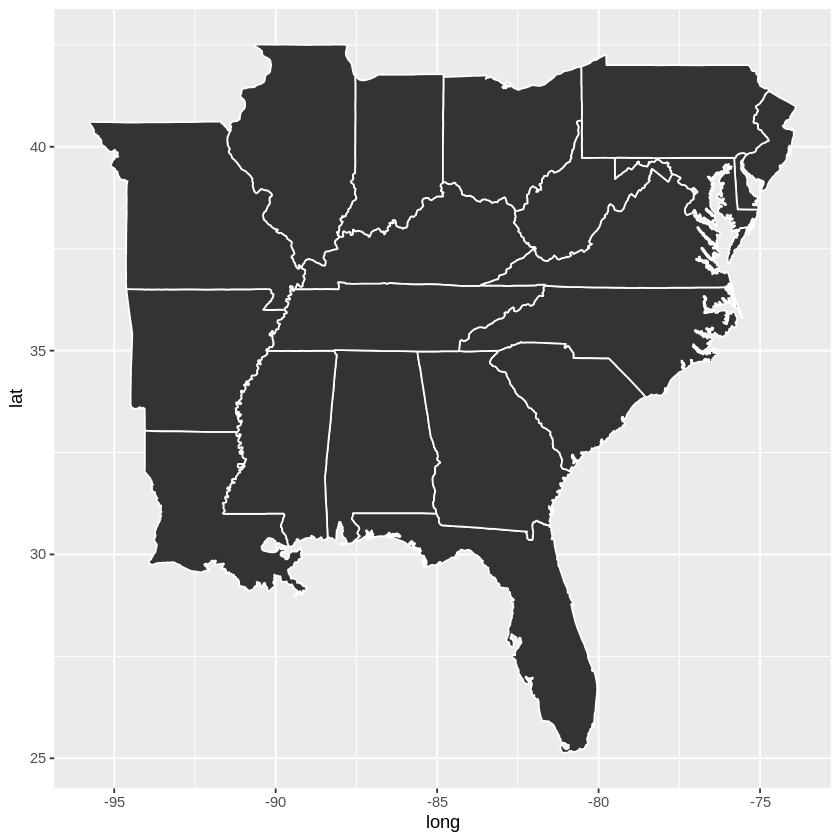

In [3]:
states <- map_data(map = "state", region = c("alabama","arkansas","delaware","florida","georgia",
                                             "illinois","indiana","kentucky","louisiana","maryland",
                                             "mississippi","missouri","new jersey","north carolina","ohio",
                                             "pennsylvania","south carolina","tennessee","virginia","west virginia"))

ggplot(states) + 
  geom_polygon(aes(x=long, y=lat, group=group), color = "white")

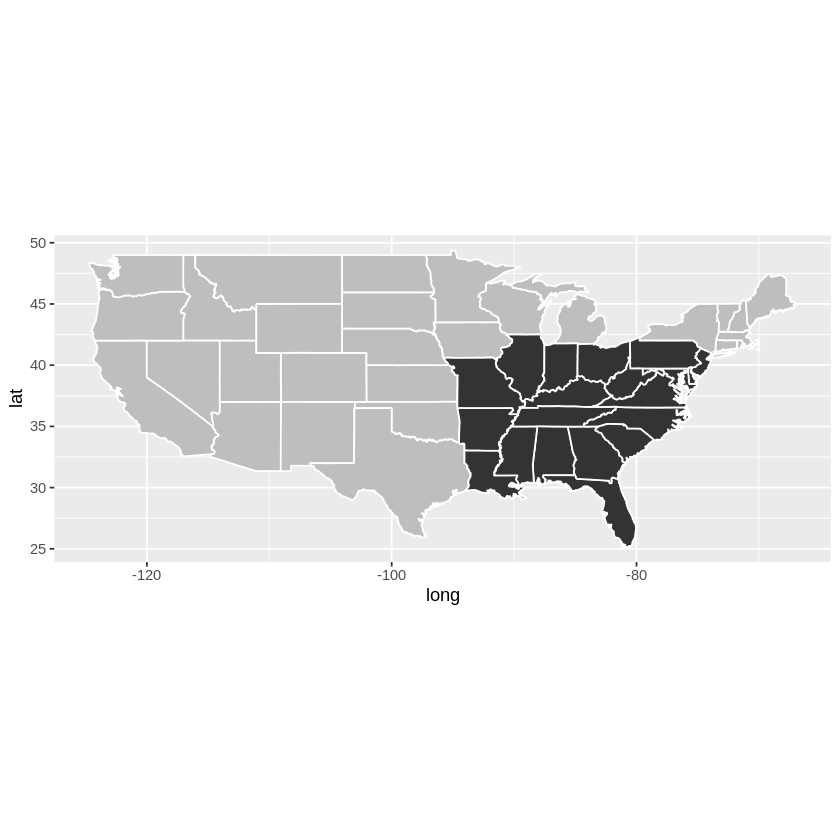

In [41]:
us <- map_data('state')

ggplot() + 
  geom_polygon(data = us, aes(x=long, y=lat, group=group), color = "white", fill = "gray") +
  geom_polygon(data = states, aes(x=long, y=lat, group=group), color = "white") +
  coord_fixed()

### Downloading and opening shapefiles

In addition to the built in datasets, a common data type in GIS is a shapefile. This is a datatype developed by ESRI and used in various softwares from ArcGIS to QGIS. In this exercise you will download and read various shapefiles.

_Note_: Because of various limitations with Colab, there will be a number of warnings reported throughout this exercise. Warnings provide information regarding potential issues with the script, but the script will run. These are different from errors which will result in the code not being executed.

In [5]:
download.file('https://github.com/chrismgentry/GIS1-Exercise-4/raw/main/Data/Hurricanes.zip', 'hurricanes.zip')
unzip('hurricanes.zip')

In [6]:
dorian <- readOGR("./Hurricanes","Dorian_2019_line")
irma <- readOGR("./Hurricanes","Irma_2017_line")
laura <-readOGR("./Hurricanes","Laura_2020_line") 
matthew <-readOGR("./Hurricanes","Matthew_2016_line") 
michael <-readOGR("./Hurricanes","Michael_2018_line") 

Warning message in OGRSpatialRef(dsn, layer, morphFromESRI = morphFromESRI, dumpSRS = dumpSRS, :
“Discarded ellps Sphere in Proj4 definition: +proj=longlat +R=6371200 +no_defs”
Warning message in OGRSpatialRef(dsn, layer, morphFromESRI = morphFromESRI, dumpSRS = dumpSRS, :
“Discarded datum Not_specified_based_on_Authalic_Sphere in Proj4 definition: +proj=longlat +R=6371200 +no_defs”
Warning message in showSRID(wkt2, "PROJ"):
“Discarded ellps Sphere in Proj4 definition: +proj=longlat +R=6371200 +no_defs +type=crs”
Warning message in showSRID(wkt2, "PROJ"):
“Discarded datum Not specified (based on Authalic Sphere) in Proj4 definition”


OGR data source with driver: ESRI Shapefile 
Source: "/content/Hurricanes", layer: "Dorian_2019_line"
with 4 features
It has 4 fields


Warning message in OGRSpatialRef(dsn, layer, morphFromESRI = morphFromESRI, dumpSRS = dumpSRS, :
“Discarded ellps Sphere in Proj4 definition: +proj=longlat +R=6371200 +no_defs”
Warning message in OGRSpatialRef(dsn, layer, morphFromESRI = morphFromESRI, dumpSRS = dumpSRS, :
“Discarded datum Not_specified_based_on_Authalic_Sphere in Proj4 definition: +proj=longlat +R=6371200 +no_defs”
Warning message in showSRID(wkt2, "PROJ"):
“Discarded ellps Sphere in Proj4 definition: +proj=longlat +R=6371200 +no_defs +type=crs”
Warning message in showSRID(wkt2, "PROJ"):
“Discarded datum Not specified (based on Authalic Sphere) in Proj4 definition”


OGR data source with driver: ESRI Shapefile 
Source: "/content/Hurricanes", layer: "Irma_2017_line"
with 20 features
It has 4 fields
Integer64 fields read as strings:  STORMNUM 


Warning message in OGRSpatialRef(dsn, layer, morphFromESRI = morphFromESRI, dumpSRS = dumpSRS, :
“Discarded ellps Sphere in Proj4 definition: +proj=longlat +R=6371200 +no_defs”
Warning message in OGRSpatialRef(dsn, layer, morphFromESRI = morphFromESRI, dumpSRS = dumpSRS, :
“Discarded datum Not_specified_based_on_Authalic_Sphere in Proj4 definition: +proj=longlat +R=6371200 +no_defs”
Warning message in showSRID(wkt2, "PROJ"):
“Discarded ellps Sphere in Proj4 definition: +proj=longlat +R=6371200 +no_defs +type=crs”
Warning message in showSRID(wkt2, "PROJ"):
“Discarded datum Not specified (based on Authalic Sphere) in Proj4 definition”


OGR data source with driver: ESRI Shapefile 
Source: "/content/Hurricanes", layer: "Laura_2020_line"
with 10 features
It has 4 fields


Warning message in OGRSpatialRef(dsn, layer, morphFromESRI = morphFromESRI, dumpSRS = dumpSRS, :
“Discarded ellps Sphere in Proj4 definition: +proj=longlat +R=6371200 +no_defs”
Warning message in OGRSpatialRef(dsn, layer, morphFromESRI = morphFromESRI, dumpSRS = dumpSRS, :
“Discarded datum Not_specified_based_on_Authalic_Sphere in Proj4 definition: +proj=longlat +R=6371200 +no_defs”
Warning message in showSRID(wkt2, "PROJ"):
“Discarded ellps Sphere in Proj4 definition: +proj=longlat +R=6371200 +no_defs +type=crs”
Warning message in showSRID(wkt2, "PROJ"):
“Discarded datum Not specified (based on Authalic Sphere) in Proj4 definition”


OGR data source with driver: ESRI Shapefile 
Source: "/content/Hurricanes", layer: "Matthew_2016_line"
with 13 features
It has 4 fields
Integer64 fields read as strings:  STORMNUM 


Warning message in OGRSpatialRef(dsn, layer, morphFromESRI = morphFromESRI, dumpSRS = dumpSRS, :
“Discarded ellps Sphere in Proj4 definition: +proj=longlat +R=6371200 +no_defs”
Warning message in OGRSpatialRef(dsn, layer, morphFromESRI = morphFromESRI, dumpSRS = dumpSRS, :
“Discarded datum Not_specified_based_on_Authalic_Sphere in Proj4 definition: +proj=longlat +R=6371200 +no_defs”
Warning message in showSRID(wkt2, "PROJ"):
“Discarded ellps Sphere in Proj4 definition: +proj=longlat +R=6371200 +no_defs +type=crs”
Warning message in showSRID(wkt2, "PROJ"):
“Discarded datum Not specified (based on Authalic Sphere) in Proj4 definition”


OGR data source with driver: ESRI Shapefile 
Source: "/content/Hurricanes", layer: "Michael_2018_line"
with 6 features
It has 4 fields


### Merging the hurricane tracks and joining the data to the ggplot2 ready object

Shapefiles cannot be immediately displayed in `ggplot2` because of their unique structure. Therefore they must be converted with **fortify** to be used in your map.

In [35]:
hurricanes <- rbind(dorian,irma,laura,matthew,michael)
hurricanes@data$id <- rownames(hurricanes@data)
sp_hurricanes <- fortify(hurricanes)
hurricane_tracks <- plyr::join(sp_hurricanes,hurricanes@data, by = "id")

### Subsetting the US counties shapefile and joining the data to the ggplot2 ready object

In [31]:
download.file('https://github.com/chrismgentry/GIS1-Exercise-4/raw/main/Data/US_Counties.zip', 'counties.zip')
unzip('counties.zip')

In [32]:
counties <- readOGR(".","USA_Counties")
subset_counties <- counties[counties$STATE_NAME == "Alabama" | counties$STATE_NAME == "Arkansas"|
                                counties$STATE_NAME == "Delaware" | counties$STATE_NAME == "Florida"|
                                counties$STATE_NAME == "Georgia" | counties$STATE_NAME == "Illinois"|
                                counties$STATE_NAME == "Indiana" | counties$STATE_NAME == "Kentucky"|
                                counties$STATE_NAME == "Louisiana" | counties$STATE_NAME == "Maryland"|
                                counties$STATE_NAME == "Mississippi" | counties$STATE_NAME == "Missouri"|
                                counties$STATE_NAME == "New Jersey" | counties$STATE_NAME == "North Carolina"|
                                counties$STATE_NAME == "Ohio" | counties$STATE_NAME == "Pennsylvania"|
                                counties$STATE_NAME == "South Carolina" | counties$STATE_NAME == "Tennessee"|
                                counties$STATE_NAME == "Virginia" | counties$STATE_NAME == "West Virginia",]

OGR data source with driver: ESRI Shapefile 
Source: "/content", layer: "USA_Counties"
with 3220 features
It has 58 fields


In [33]:
subset_counties@data$id <- rownames(subset_counties@data)
counties_data <- fortify(subset_counties)
se_counties <- plyr::join(counties_data,subset_counties@data, by = "id")

Regions defined for each Polygons



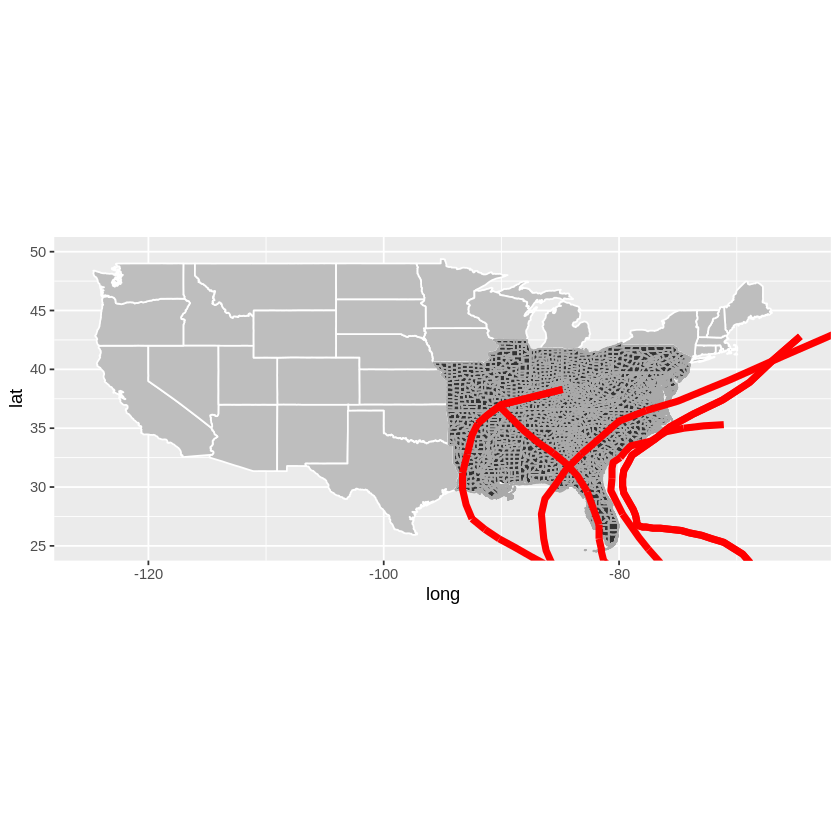

In [45]:
ggplot() + 
  geom_polygon(data = us, aes(x=long, y=lat, group=group), color = "white", fill = "gray") +
  geom_polygon(data = states, aes(x=long, y=lat, group=group), color = "white") +
  geom_polygon(data = se_counties, aes(x=long, y=lat, group=group), color = "darkgray", fill = "NA") +
  geom_path(data = hurricane_tracks, aes(x=long, y=lat, group=group), color = "red", size = 2) +
  coord_fixed(xlim = c(-125,-65), ylim = c(25,50))

## **Question No. 1**
What variables are present in the hurricane track dataset? Which of these could be used to categorize the data in a new visualization? _Answer in the code cell below._<br>

### **ANSWER**:

# Step Two: The Analyses
In this step you will organize and display the data in order to prepare it for the final visualization.

### Buffering the hurricane tracks and creating a ggplot2 ready object

In this step you will create a buffer of the hurricane tracks, create a new object and attach the data, and create an intersection of the data.

In [19]:
hurricanes_buffer <- buffer(hurricanes, width = 1, dissolve = TRUE)

In [20]:
intersection <- raster::intersect(hurricanes_buffer,subset_counties)
intersection@data$id <- rownames(intersection@data)
hurricanes_counties <- fortify(intersection)
impacted_counties <- plyr::join(hurricanes_counties,intersection@data, by = "id")

Warning message in RGEOSUnaryPredFunc(spgeom, byid, "rgeos_isvalid"):
“Ring Self-intersection at or near point -93.460639950000001 30.866492990000001”
Warning message in RGEOSUnaryPredFunc(spgeom, byid, "rgeos_isvalid"):
“Ring Self-intersection at or near point -93.031722939999995 30.361456050000001”
Warning message in RGEOSUnaryPredFunc(spgeom, byid, "rgeos_isvalid"):
“Ring Self-intersection at or near point -85.389815949999999 29.959059969999998”
Warning message in RGEOSUnaryPredFunc(spgeom, byid, "rgeos_isvalid"):
“Ring Self-intersection at or near point -86.037590960000003 30.704573020000002”
Warning message in RGEOSUnaryPredFunc(spgeom, byid, "rgeos_isvalid"):
“Ring Self-intersection at or near point -84.381147029999994 30.56141092”
Warning message in RGEOSUnaryPredFunc(spgeom, byid, "rgeos_isvalid"):
“Ring Self-intersection at or near point -84.683844969999996 30.35780183”
Warning message in RGEOSUnaryPredFunc(spgeom, byid, "rgeos_isvalid"):
“Ring Self-intersection at or near poi

## **Question No. 2**
To answer this question you will need to create a dataset that won't be used in the map. Due to the dissected nature of the data, you need to examine the distinct _ids_ of the impacted counties. This can be done using the following script:

```county_populations <- distinct(impacted_counties, FIPS, .keep_all = TRUE)```

Where you are using the _impacted_counties_ dataset and keeping only the _distinct_ federal FIPS code that is unique to each county.

<blockquote>
With the dataset above, write a script using <b>sum()</b> to determine the total population impacted by the hurricanes?
</blockquote>
<i><small>HINT: Similar to Exercise 3, Question 2 place the object followed by a $ and the variable name between the () in the sum function. You can use <b>str()</b> to view the variables available in the dataset.</small></i>

### **ANSWER**:

# Step Three: The Visualization
You will now create a graphical display of your data that includes cartographic elements such as legend, scale bar, north arrow, etc.

### Visualizing the data

Here you will use the previously created datsets for the US, southeast counties, southern states, hurricane impacted counties, and hurricane tracks to create a visualization of the information. Addtionally, you will learn how to create inset, or overview, maps and add them to your display.

This world and states datasets will be used to add spatial context and reduce whitespace. Remember the order of the objects determines how they are displayed.

In [21]:
world <- map_data(map = "world")

Creating the primary map.

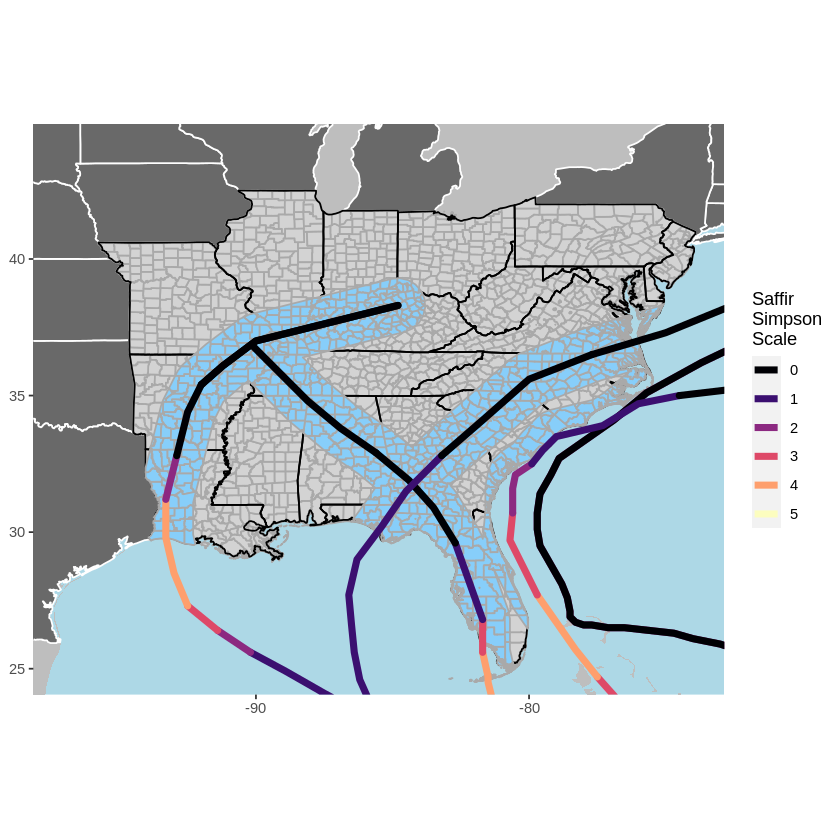

In [39]:
main_map <- ggplot() + 
  geom_polygon(data = world, aes(x=long, y=lat, group=group), color = NA, fill = "gray") +
  geom_polygon(data = us, aes(x=long, y=lat, group=group), color = "white", fill = "DimGray") +
  geom_polygon(data = se_counties, aes(x=long, y=lat, group=group), fill = "LightGray", color = "DarkGray") +
  geom_polygon(data = states, aes(x=long, y=lat, group=group), color = "black", fill = NA) +
  geom_polygon(data = impacted_counties, aes(x=long, y=lat, group=group), color = "DarkGray", fill = "LightSkyBlue") +
  geom_path(data = hurricane_tracks, aes(x=long, y=lat, group=group, color = as.character(SS)), size = 2, lineend = "round") +
  scale_color_viridis_d(option = "A", "Saffir\nSimpson\nScale") +
  coord_fixed(xlim = c(-97,-74), ylim = c(25,44)) + 
  theme(axis.title.x=element_blank(), axis.title.y=element_blank(), panel.background = element_rect(fill = "lightblue"), 
        panel.grid.major = element_blank(), panel.grid.minor = element_blank())
main_map

Creating the inset map.

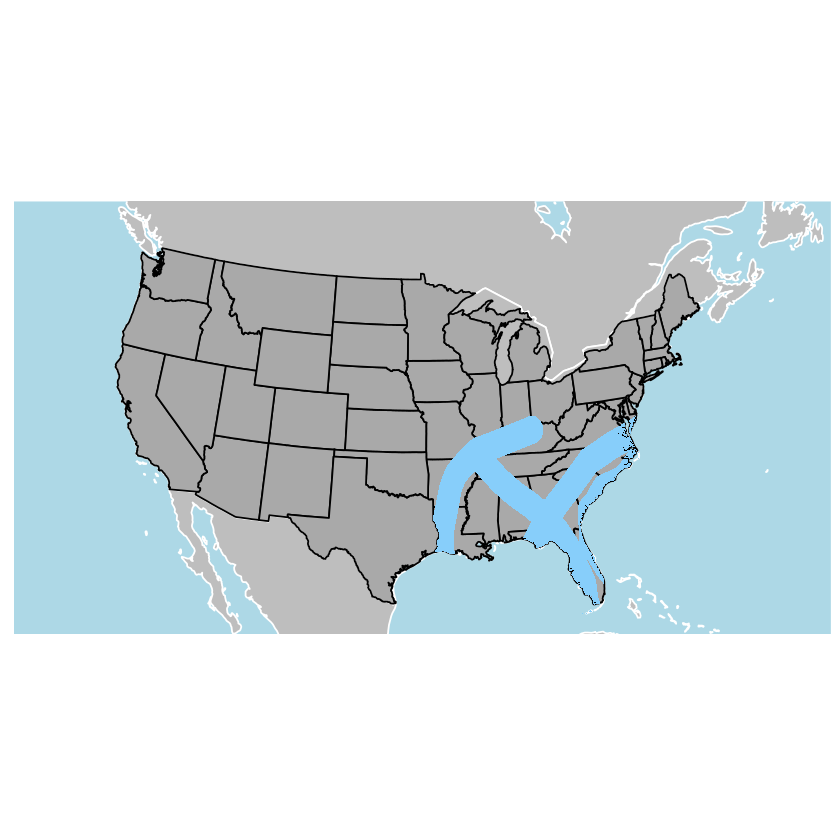

In [49]:
inset <- ggplot() + 
  geom_polygon(data = world, aes(x=long, y=lat, group=group), color = "white", fill = "gray") +
  geom_polygon(data = us, aes(x=long, y=lat, group=group), color = "black", fill = "DarkGray") +
  geom_polygon(data = impacted_counties, aes(x=long, y=lat, group=group), color = NA, fill = "LightSkyBlue") +
  coord_map(xlim = c(-125,-65), ylim = c(25,50), "conic", lat0 = 30) +
  theme(panel.background = element_rect(fill = "lightblue"), panel.grid.major = element_blank(), panel.grid.minor = element_blank(), 
        axis.line=element_blank(), axis.text.x=element_blank(), axis.text.y=element_blank(),axis.ticks=element_blank(), 
        axis.title.x=element_blank(), axis.title.y=element_blank())
inset

Combining the inset and primary maps

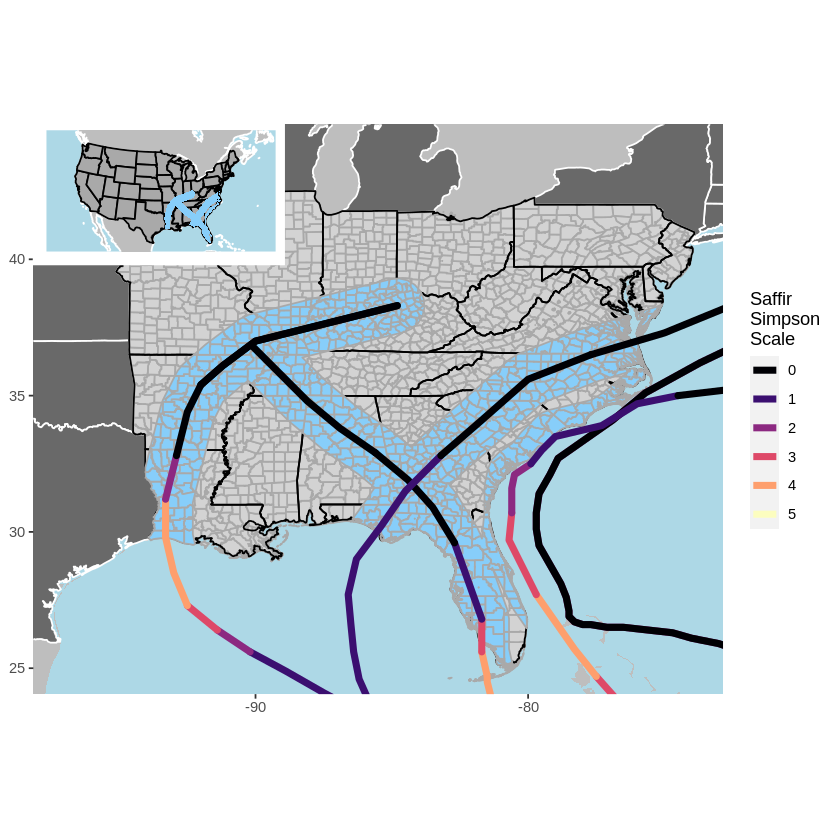

In [40]:
ggdraw() +
draw_plot(main_map) + 
draw_plot(inset, x = 0.039, y = 0.62, width = 0.3, height = 0.3)

## **Question No. 3**
<blockquote>
In the answer block below, provide the full script you would use to add the north arrow, title, scalebar, and name/date information to the map.
</blockquote>

### **ANSWER**:

# Step Four: Your Turn
Edit your map to add major cities and cities with populations greater than 300,000 to the map.

Similar to the steps above, the script below will download the cities dataset and create a subset that covers only those located in one of our target states.

In [50]:
download.file('https://github.com/chrismgentry/GIS1-Exercise-4/raw/main/Data/US_Cities_100k.zip', 'cities.zip')
unzip('cities.zip')

cities <- readOGR(".","US_Cities_100k")

subset_cities <- cities[cities$ST == "AL" | cities$ST == "AR"|
                              cities$ST == "DE" | cities$ST == "FL"|
                              cities$ST == "GA" | cities$ST == "IL"|
                              cities$ST == "IN" | cities$ST == "KY"|
                              cities$ST == "LA" | cities$ST == "MD"|
                              cities$ST == "MS" | cities$ST == "MO"|
                              cities$ST == "NJ" | cities$ST == "NC"|
                              cities$ST == "OH" | cities$ST == "PA"|
                              cities$ST == "SC" | cities$ST == "TN"|
                              cities$ST == "VA" | cities$ST == "WV",]

OGR data source with driver: ESRI Shapefile 
Source: "/content", layer: "US_Cities_100k"
with 318 features
It has 49 fields


Next you will need to intersect the subset cities above with the hurricane buffer to further reduce the cities to only those within the buffer created above.

In [82]:
cities_intersect <- raster::intersect(subset_cities,hurricanes_buffer)
cities_intersect@data$id <- rownames(cities_intersect@data)
se_cities <- data.frame(cities_intersect)
names(se_cities)[names(se_cities) =="coords.x1"] <- "long"
names(se_cities)[names(se_cities) =="coords.x2"] <- "lat"

Then you will create an object of cities that have a population larger than 300,000 people.

In [84]:
large_cities <- se_cities[se_cities$POPULATION > 300000,]

Finally, you need to create the map that includes the cities information. You can use the inset map you already created as well as the previous objects. Remove the **#** below and complete the script to create the final map.<br>
<i><small>HINT: Some lines of the script you haven't already learned have been completed. You must add data for the rest of the visualization including the map elements (north arrow, scalebar, etc.) you created above.</small></i>


In [ ]:
cities_map <- ggplot() + 
#  geom_polygon(data = World
#  geom_polygon(data = US States
#  geom_polygon(data = SE Counties
#  geom_polygon(data = SE States
#  geom_polygon(data = Impacted Counties
#  geom_path(data = Hurricane Tracks
#  scale_color_viridis_d(option = "A", "Saffir\nSimpson\nScale") +
  geom_point(data = se_cities, aes(x=long, y=lat), color = "yellow") +
  geom_point(data = large_cities, aes(x=long, y=lat), color = "yellow") +
  geom_text(data = large_cities, aes(x=long, y=lat, label = NAME, fontface = "bold"), size = 3, 
            nudge_y = 0.60, nudge_x = 0.25, check_overlap = TRUE, color = "white") +
  annotate("text", x = -86.85, y = 38.5, label = "Louisville", fontface = "bold", size = 3, color = "white") +
#  coord_sf(Limiting coordinates to focus on the SE US
  theme(axis.title.x=element_blank(), axis.title.y=element_blank(),
        panel.background = element_rect(fill = "lightblue"), 
        panel.grid.major = element_blank(), panel.grid.minor = element_blank())
#cities_map

In [ ]:
ggdraw() +
draw_plot(cities_map) + 
draw_plot(inset, x = 0.039, y = 0.62, width = 0.3, height = 0.3)

## **Question No. 4**
<blockquote>
What labeled cities are the furthest North, South, East, and West?
</blockquote>

# The Write-Up
In the report you provide to FEMA please provide the following information:

- Total number of large cities (all in the clipped dataset)
- Which cities above 300,000 people would need response teams
- Total population of the impacted counties
  - Add a code block below and alter the script used to answer Question 2 but use the object for the impacted counties
- Based on the distribution of these, would it be possible for one response team to cover multiple large cities?

When complete, send a link to your Colab Notebook or word document with answers to Questions 1-4 and your completed map via email.

### **Type write-up here**: